# SIGN LANGUAGE RECOGNITION AND PREDICTION
# BY:-
# SHUBHKIRTI (21CSU273) AND YASHIKA GREWAL (21CSU274)

### Sign Language Recognition is the process of interpreting hand gestures or motions into understandable language using technology, often through machine learning models. The aim is to help bridge communication gaps for individuals with hearing impairments, enabling them to interact more seamlessly with others. 

## AMERICAN SIGN LANGUAGE

![American Sign Language](american_sign_language.PNG)

## Importing Necessary Libraries

In [24]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.preprocessing import image
from tkinter import messagebox
from tkinter import filedialog
from tensorflow.keras.models import load_model
from PIL import Image, ImageTk

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


## Exploring the Dataset 
### Using the Sign MNIST dataset, which contains images of American Sign Language (ASL) letters (A-Z) for training the models.

### Dataset Link: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
### Dataset Description: The Sign Language MNIST dataset is specifically designed for American Sign Language (ASL) letter gestures. It includes 24 classes (A-Z, excluding J and Z due to motion requirements). The dataset serves as a benchmark for multi-class image recognition tasks and is formatted similarly to MNIST with grayscale, 28x28-pixel images.
### Data Format: The data is provided in CSV files containing labels and 784 pixel values for each image.  
### Size: The dataset includes 27,455 training samples and 7,172 testing samples.
### Creation: The dataset was expanded from 1,704 original hand gesture images. Images were cropped to focus on hands, converted to grayscale, and resized to 28x28 pixels. Random variations were applied, including pixelation, brightness/contrast adjustments, and slight rotations, creating over 50 diverse versions of each image.

In [2]:
# Load dataset
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

In [3]:
# Display the first few rows of the training dataset
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# Display the first few rows of the testing dataset
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


## Preprocessing the Dataset 
### Resizing, converting to grayscale, normalizing and flattening images for the input layer of neural networks.

In [5]:
# Preprocessing the data
labels = train['label'].values
train_images = train.drop('label', axis=1).values
test_labels = test['label'].values
test_images = test.drop('label', axis=1).values

# Reshape and normalize images
train_images = np.array([np.reshape(i, (28, 28)) for i in train_images])
train_images = np.array([i.flatten() for i in train_images]) / 255.0

test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images]) / 255.0

# Label encoding
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
test_labels = label_binarizer.transform(test_labels)

# Split the data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(train_images, labels, test_size=0.2, random_state=42)

# Reshape the data for CNN model
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1)  
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)      
x_train_dnn = x_train
x_test_dnn = x_test

## Visualizing the Data 

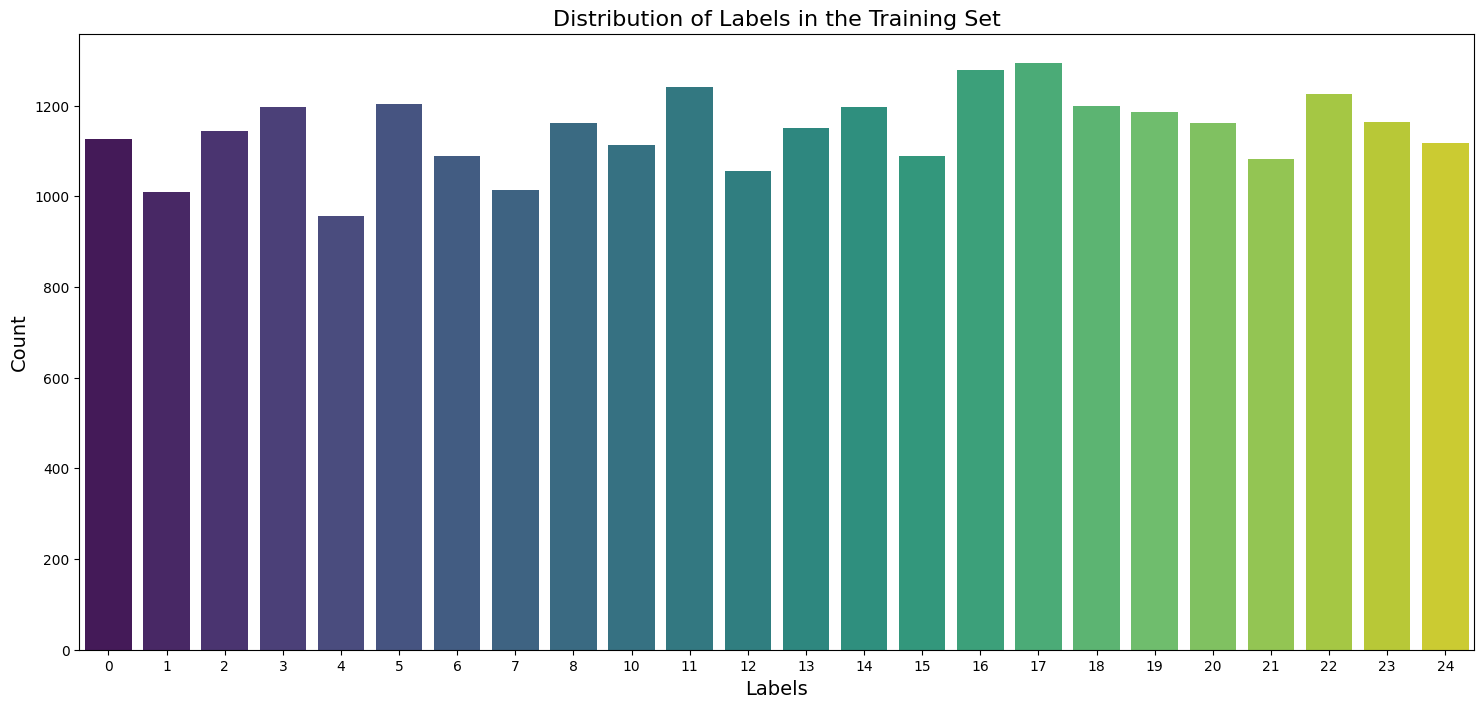

In [6]:
# Dataset Analysis: Label Distribution
plt.figure(figsize=(18, 8))
sns.countplot(x=train['label'], palette='viridis')
plt.title("Distribution of Labels in the Training Set", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

In [7]:
# Unique labels
unique_labels = np.unique(train['label'])
print(f"Unique Labels: {unique_labels}")

Unique Labels: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


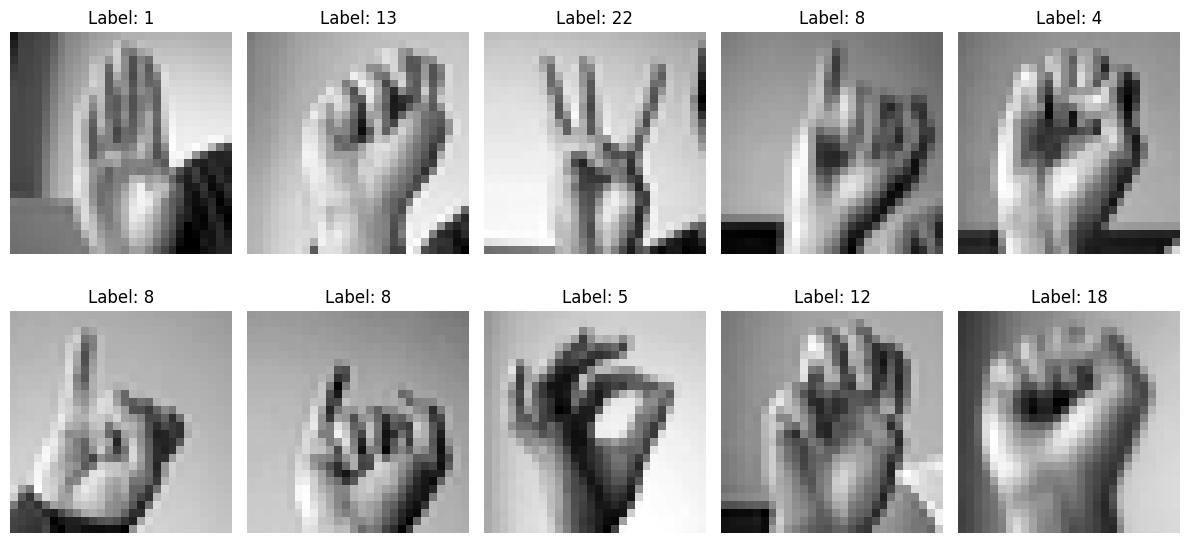

In [8]:
# Prepare images
labels = train['label'].values
images = train.drop('label', axis=1).values
images = np.array([np.reshape(i, (28, 28)) for i in images])

# Visualize random samples
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    idx = np.random.randint(0, len(images))
    plt.imshow(images[idx], cmap='gray')
    plt.title(f"Label: {labels[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

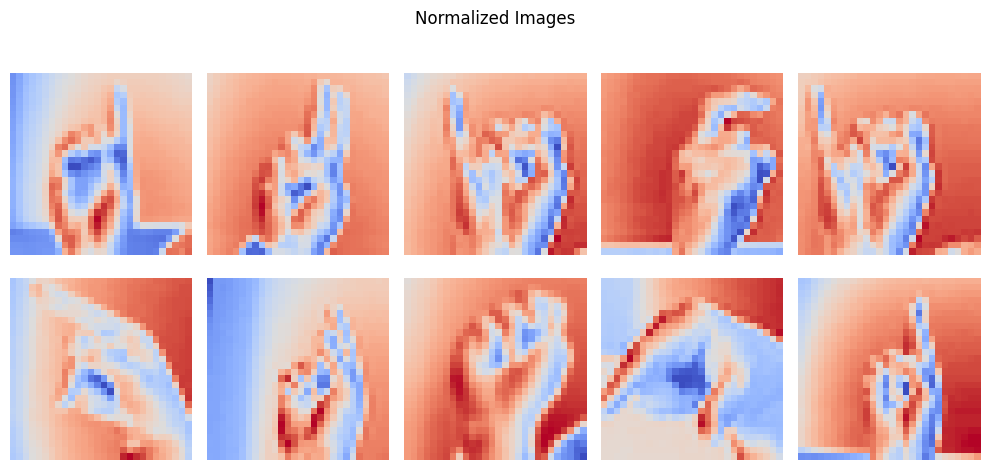

In [9]:
# Display transformations (normalized and reshaped images)
plt.figure(figsize=(10, 5))
normalized_images = images / 255.0
for i in range(10):
    plt.subplot(2, 5, i + 1)
    idx = np.random.randint(0, len(normalized_images))
    plt.imshow(normalized_images[idx], cmap='coolwarm')
    plt.axis('off')
plt.suptitle("Normalized Images")
plt.tight_layout()
plt.show()

## Training and Evaluating the Model
### Training each model (CNN and DNN) using the preprocessed training data.
### Employing techniques such as dropout, batch normalization and Adam optimizer to improve model accuracy. 
### Evaluating models using metrics like accuracy, confusion matrix and loss to measure their performance on test data.
### Plotting accuracy curves and loss graphs for each model to track training and validation performance.

## Convolutional Neural Network (CNN Model)
###  Using a CNN model to learn spatial hierarchies of features from images which is suitable for image classification tasks.

In [10]:
# 1. CNN Model
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(24, activation='softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [11]:
# CNN Model Summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [12]:
# Train CNN model
history_cnn = cnn.fit(x_train_cnn, y_train, validation_data=(x_test_cnn, y_test), epochs=10, batch_size=128)

Epoch 1/10
172/172 [==============================] - 24s 124ms/step - loss: 2.3593 - accuracy: 0.2673 - val_loss: 1.2034 - val_accuracy: 0.6185
Epoch 2/10
172/172 [==============================] - 21s 124ms/step - loss: 0.9728 - accuracy: 0.6675 - val_loss: 0.6069 - val_accuracy: 0.8170
Epoch 3/10
172/172 [==============================] - 21s 121ms/step - loss: 0.5602 - accuracy: 0.8104 - val_loss: 0.3875 - val_accuracy: 0.8838
Epoch 4/10
172/172 [==============================] - 21s 121ms/step - loss: 0.3457 - accuracy: 0.8844 - val_loss: 0.1907 - val_accuracy: 0.9488
Epoch 5/10
172/172 [==============================] - 21s 123ms/step - loss: 0.2269 - accuracy: 0.9273 - val_loss: 0.1260 - val_accuracy: 0.9725
Epoch 6/10
172/172 [==============================] - 21s 122ms/step - loss: 0.1516 - accuracy: 0.9526 - val_loss: 0.0761 - val_accuracy: 0.9840
Epoch 7/10
172/172 [==============================] - 21s 121ms/step - loss: 0.1005 - accuracy: 0.9705 - val_loss: 0.0639 - val_ac

In [13]:
# Save CNN model
cnn.save("sign_mnist_cnn.h5")

# Evaluate CNN model on test data
cnn_accuracy = cnn.evaluate(x_test_cnn, y_test, verbose=0)[1]
print(cnn_accuracy)

0.9990894198417664


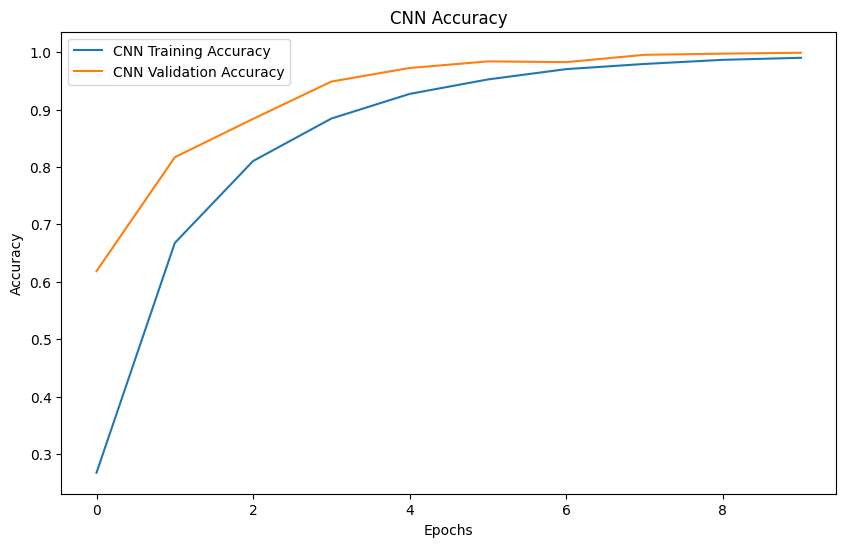

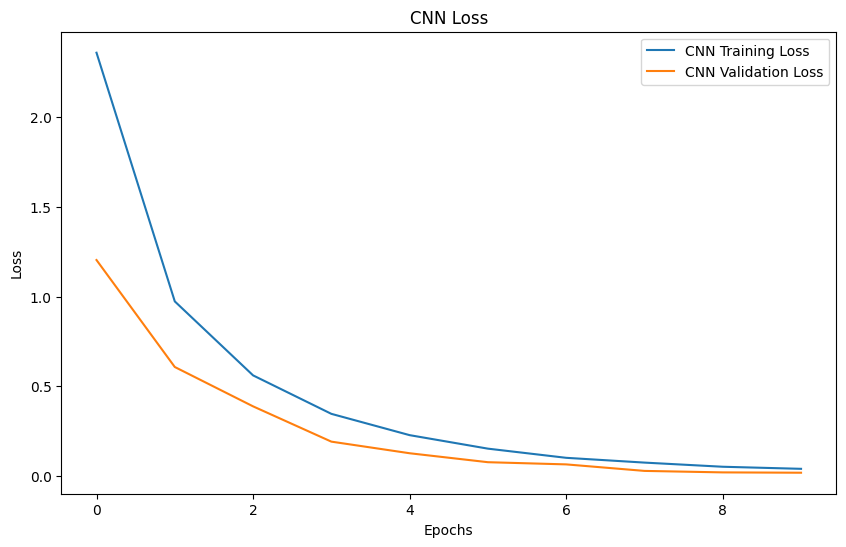

In [14]:
# Plotting CNN Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title("CNN Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting CNN Training Loss
plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['loss'], label='CNN Training Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.title("CNN Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

172/172 [==============================] - 3s 20ms/step


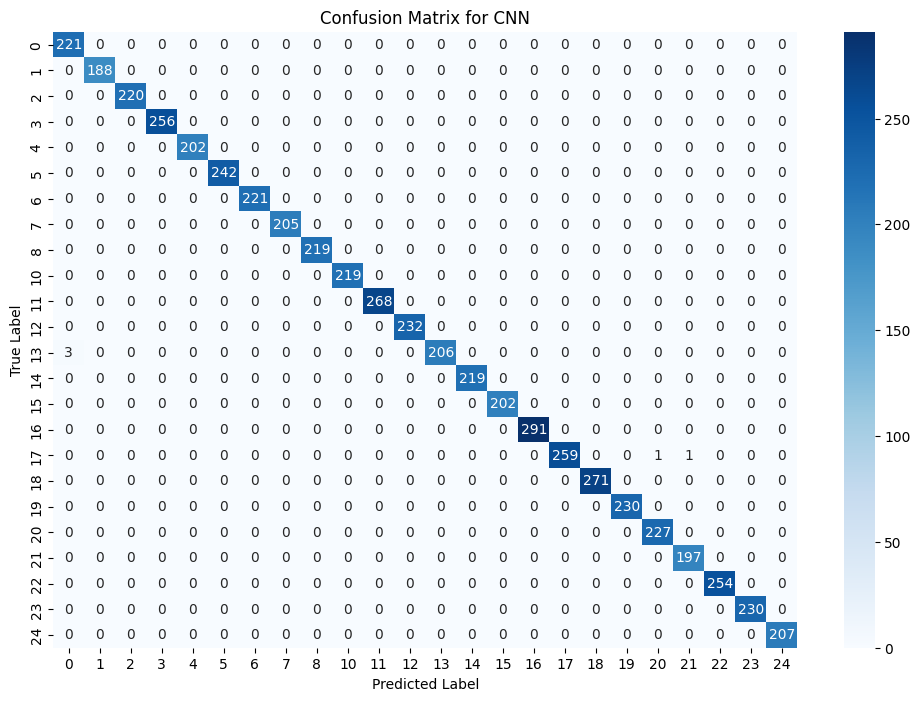

In [25]:
# Confusion Matrix for CNN
y_cnn_pred = np.argmax(cnn.predict(x_test_cnn), axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix_cnn = confusion_matrix(y_true, y_cnn_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_)
plt.title("Confusion Matrix for CNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [27]:
# Predict and true labels
y_cnn_pred = np.argmax(cnn.predict(x_test_cnn), axis=1)
y_true = np.argmax(y_test, axis=1)

# Overall metrics
f1 = f1_score(y_true, y_cnn_pred, average='weighted')  # Weighted average of F1 scores
precision = precision_score(y_true, y_cnn_pred, average='weighted')  # Weighted average precision
recall = recall_score(y_true, y_cnn_pred, average='weighted')  # Weighted average recall

# Print the results
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")

# Classification Report (optional, for detailed breakdown)
print("\nClassification Report for CNN:")
print(classification_report(y_true, y_cnn_pred, target_names=[str(cls) for cls in label_binarizer.classes_]))

172/172 [==============================] - 3s 17ms/step
Overall Precision: 0.9991
Overall Recall: 0.9991
Overall F1 Score: 0.9991

Classification Report for CNN:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       221
           1       1.00      1.00      1.00       188
           2       1.00      1.00      1.00       220
           3       1.00      1.00      1.00       256
           4       1.00      1.00      1.00       202
           5       1.00      1.00      1.00       242
           6       1.00      1.00      1.00       221
           7       1.00      1.00      1.00       205
           8       1.00      1.00      1.00       219
          10       1.00      1.00      1.00       219
          11       1.00      1.00      1.00       268
          12       1.00      1.00      1.00       232
          13       1.00      0.99      0.99       209
          14       1.00      1.00      1.00       219
          15       1.00    

## Deep Neural Network (DNN Model)
### Implementing a fully connected neural network for classification of signs based on image features.

In [28]:
# 2. DNN Model
dnn = Sequential()
dnn.add(Dense(512, activation='relu', input_dim=784))
dnn.add(Dense(256, activation='relu'))
dnn.add(Dense(128, activation='relu'))
dnn.add(Dense(24, activation='softmax'))
dnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [29]:
# DNN Model Summary
dnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 24)                3096      
                                                                 
Total params: 569240 (2.17 MB)
Trainable params: 569240 (2.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Train DNN model
history_dnn = dnn.fit(x_train_dnn, y_train, validation_data=(x_test_dnn, y_test), epochs=10, batch_size=128)

Epoch 1/10
172/172 [==============================] - 6s 21ms/step - loss: 2.1593 - accuracy: 0.3395 - val_loss: 1.4655 - val_accuracy: 0.5556
Epoch 2/10
172/172 [==============================] - 3s 19ms/step - loss: 1.1658 - accuracy: 0.6273 - val_loss: 1.0145 - val_accuracy: 0.6751
Epoch 3/10
172/172 [==============================] - 4s 21ms/step - loss: 0.7680 - accuracy: 0.7566 - val_loss: 0.6016 - val_accuracy: 0.8097
Epoch 4/10
172/172 [==============================] - 3s 19ms/step - loss: 0.4967 - accuracy: 0.8475 - val_loss: 0.6852 - val_accuracy: 0.7567
Epoch 5/10
172/172 [==============================] - 3s 20ms/step - loss: 0.3701 - accuracy: 0.8826 - val_loss: 0.3521 - val_accuracy: 0.8915
Epoch 6/10
172/172 [==============================] - 4s 21ms/step - loss: 0.2363 - accuracy: 0.9315 - val_loss: 0.1676 - val_accuracy: 0.9608
Epoch 7/10
172/172 [==============================] - 3s 19ms/step - loss: 0.1426 - accuracy: 0.9631 - val_loss: 0.1207 - val_accuracy: 0.9751

In [31]:
# Save DNN model
dnn.save("sign_mnist_dnn.h5")

# Evaluate DNN model on test data
dnn_accuracy = dnn.evaluate(x_test_dnn, y_test, verbose=0)[1]
print(dnn_accuracy)

0.9928974509239197


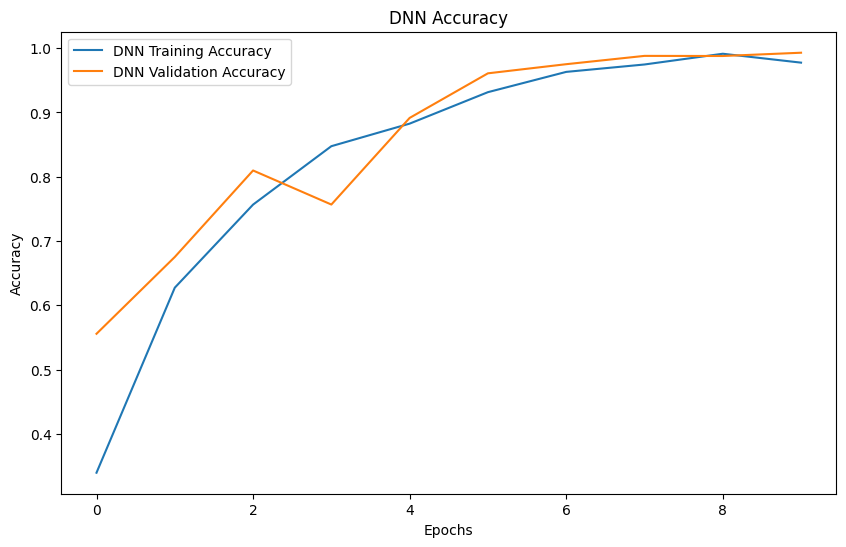

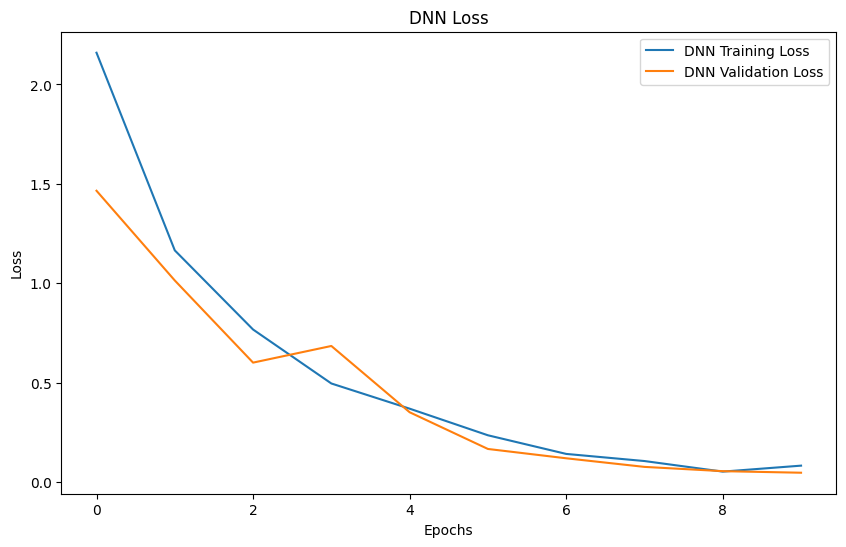

In [32]:
# Plotting DNN Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_dnn.history['accuracy'], label='DNN Training Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='DNN Validation Accuracy')
plt.title("DNN Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting DNN Training Loss
plt.figure(figsize=(10, 6))
plt.plot(history_dnn.history['loss'], label='DNN Training Loss')
plt.plot(history_dnn.history['val_loss'], label='DNN Validation Loss')
plt.title("DNN Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

172/172 [==============================] - 1s 5ms/step


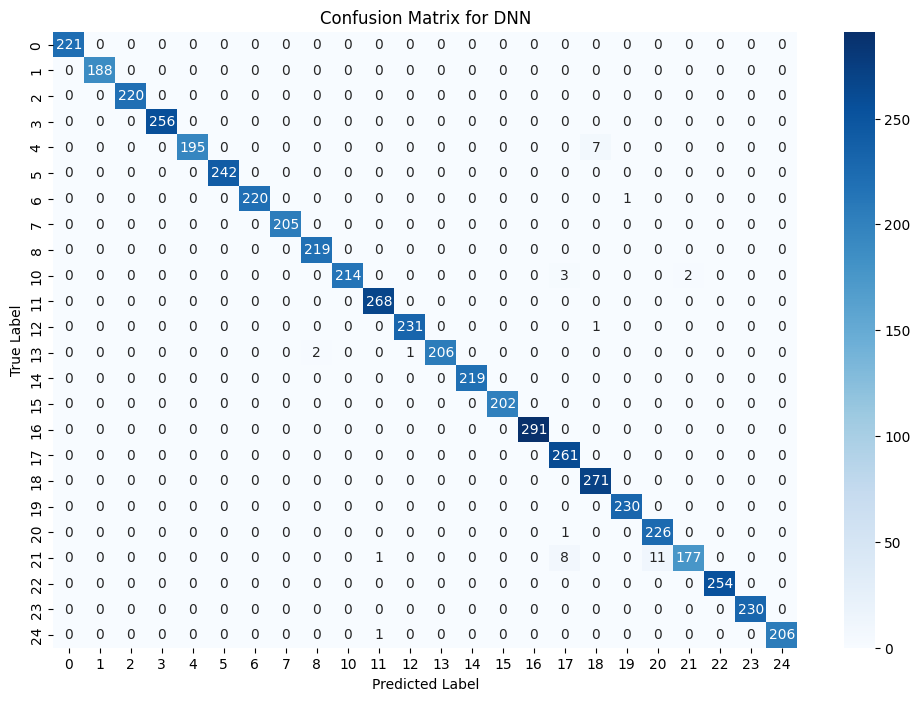

In [33]:
# Confusion Matrix for DNN
y_dnn_pred = np.argmax(dnn.predict(x_test_dnn), axis=1)
conf_matrix_dnn = confusion_matrix(y_true, y_dnn_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_dnn, annot=True, fmt='d', cmap='Blues', xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_)
plt.title("Confusion Matrix for DNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [34]:
# Predict and true labels
y_dnn_pred = np.argmax(dnn.predict(x_test_dnn), axis=1)
y_true = np.argmax(y_test, axis=1)

# Overall metrics
f1 = f1_score(y_true, y_dnn_pred, average='weighted')  # Weighted average of F1 scores
precision = precision_score(y_true, y_dnn_pred, average='weighted')  # Weighted average precision
recall = recall_score(y_true, y_dnn_pred, average='weighted')  # Weighted average recall

# Print the results
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")

# Classification Report (optional, for detailed breakdown)
print("\nClassification Report for DNN:")
print(classification_report(y_true, y_dnn_pred, target_names=[str(cls) for cls in label_binarizer.classes_]))

172/172 [==============================] - 1s 5ms/step
Overall Precision: 0.9931
Overall Recall: 0.9929
Overall F1 Score: 0.9928

Classification Report for DNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       188
           2       1.00      1.00      1.00       220
           3       1.00      1.00      1.00       256
           4       1.00      0.97      0.98       202
           5       1.00      1.00      1.00       242
           6       1.00      1.00      1.00       221
           7       1.00      1.00      1.00       205
           8       0.99      1.00      1.00       219
          10       1.00      0.98      0.99       219
          11       0.99      1.00      1.00       268
          12       1.00      1.00      1.00       232
          13       1.00      0.99      0.99       209
          14       1.00      1.00      1.00       219
          15       1.00     

Best Model for Webcam Prediction: CNN with Accuracy: 0.9990894198417664


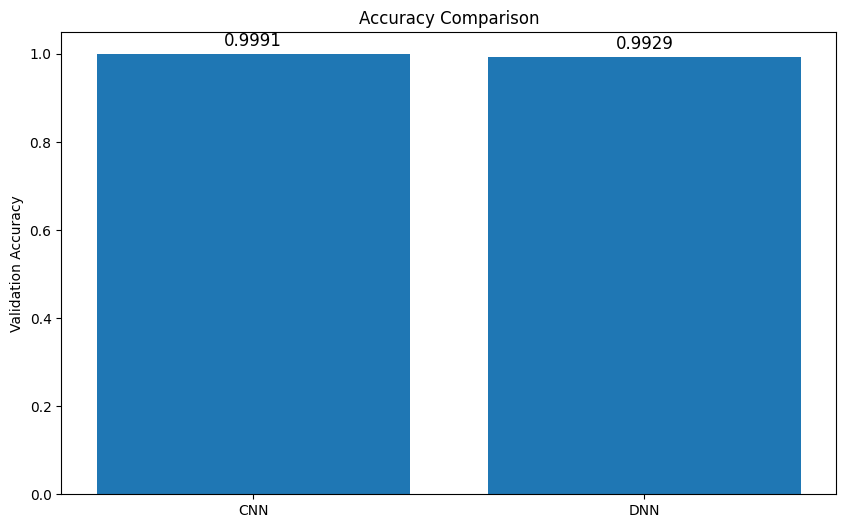

In [35]:
# Compare the accuracies and choose the best model for webcam prediction
accuracies = {'CNN': cnn_accuracy, 'DNN': dnn_accuracy}
best_model_name = max(accuracies, key=accuracies.get)
best_model = cnn if best_model_name == "CNN" else dnn
print(f"Best Model for Webcam Prediction: {best_model_name} with Accuracy: {accuracies[best_model_name]}")

# Plotting accuracy comparison between models
plt.figure(figsize=(10, 6))
bars = plt.bar(['CNN', 'DNN'], [cnn_accuracy, dnn_accuracy])

# Adding accuracy text on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=12)

plt.title("Accuracy Comparison")
plt.ylabel("Validation Accuracy")
plt.show()

## Real-time Sign Language Recognition
### Capturing live video feed from a webcam and processing it to detect and predict hand gestures in real-time.
### Displaying predicted signs on the webcam feed, with the option to break the sign into text.
### Implementing an interface with Tkinter to upload images or use the webcam for sign language prediction.

!['MNIST'](amer_sign2.png)

In [ ]:
# Define class labels (sign language letters)
classLabels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 
               18: 'T', 19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y'}

# Global variable to track the webcam state
cap = None  # Will hold the webcam object to close it when exiting

# Function to convert prediction result to letter
def getLetter(result):
    try:
        return classLabels[result]
    except:
        return "Error"

# Function for webcam prediction
def predict_webcam(model, model_name):
    global cap
    cap = cv2.VideoCapture(0)  # Open the webcam
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.flip(frame, 1)  # Flip the frame for a mirror effect
        roi = frame[100:400, 100:400]  # Define region of interest (ROI) for top-left corner

        # Preprocess the ROI
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        roi_resized = cv2.resize(roi_gray, (28, 28), interpolation=cv2.INTER_AREA)  # Resize for CNN input size
        roi_resized = roi_resized.astype('float32') / 255.0  # Normalize

        # Prepare the image for DNN and ResNet models
        roi_resized_rgb = cv2.cvtColor(roi_resized, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB for ResNet
        roi_resized_rgb = np.repeat(roi_resized_rgb, 3, axis=-1)  # Make the image 3 channels for ResNet
        roi_resized_rgb = np.expand_dims(roi_resized_rgb, axis=0)  # Add batch dimension

        # Fix the shape for CNN model
        roi_resized = np.expand_dims(roi_resized, axis=-1)  # Add channel dimension (grayscale image)
        roi_resized = np.expand_dims(roi_resized, axis=0)  # Add batch dimension (1 image)

        # Predict using the selected model
        if model_name == "CNN":
            result = np.argmax(model.predict(roi_resized), axis=1)
        elif model_name == "DNN":
            roi_resized = roi_resized.flatten().reshape(1, -1)  # Flatten for DNN
            result = np.argmax(model.predict(roi_resized), axis=1)

        # Show the prediction on the frame
        cv2.putText(frame, f"Predicted: {getLetter(result[0])}", (10, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3, cv2.LINE_AA)

        cv2.rectangle(frame, (100, 100), (400, 400), (255, 0, 0), 3)  # Draw rectangle around ROI (top-left)
        cv2.imshow("Webcam Sign Prediction", frame)

        # Exit webcam when 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    if cap is not None:
        cap.release()  # Release the webcam capture
    cv2.destroyAllWindows()  # Close OpenCV windows

# Function for uploading image
def upload_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = image.load_img(file_path, target_size=(28, 28), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = img_array.astype('float32') / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict the uploaded image using the best model
        if best_model_name == "CNN":
            result = np.argmax(cnn.predict(img_array), axis=1)
        elif best_model_name == "DNN":
            img_array = img_array.flatten().reshape(1, -1)  # Flatten for DNN
            result = np.argmax(dnn.predict(img_array), axis=1)

        prediction = getLetter(result[0])
        result_label.config(text=f"Predicted: {prediction}", font=("Helvetica", 16))

# Function to show instructions
def show_instructions():
    instructions_window = tk.Toplevel(root)
    instructions_window.title("Learn More & Instructions")

    instructions_text = """
    Welcome to the Sign Language Recognition and Prediction!
    
    Sign language is a visual language that uses hand gestures, facial expressions 
    and body language to convey meaning. It is primarily used by deaf and 
    hard-of-hearing individuals for communication. American Sign Language (ASL) is 
    one of the most widely used sign languages, primarily in the U.S. and Canada. 
    ASL has its unique grammar and linguistic structure, making it a complete language, 
    independent of spoken English.
    
    This app allows you to:
    1. Upload a hand sign image to predict the corresponding letter.
    2. Use your webcam for real-time sign language recognition.

    Instructions:
    - For image upload: Click the 'Upload Image' button and select a hand sign image.
    - For webcam: Click 'Start Webcam Prediction' to begin real-time sign language prediction.
    - The prediction result will be displayed on the screen.
    """
    
    label = tk.Label(instructions_window, text=instructions_text, font=("Helvetica", 12), justify="left")
    label.pack(padx=20, pady=20)

    close_button = tk.Button(instructions_window, text="Close", command=instructions_window.destroy)
    close_button.pack(pady=10)

# Function to show exit page
def show_exit_page():
    exit_window = tk.Toplevel(root)
    exit_window.title("Thank You")
    exit_window.geometry("400x200")  # Set window size

    thank_you_text = "Thank you for using the Sign Language Recognition and Prediction!"
    label = tk.Label(exit_window, text=thank_you_text, font=("Helvetica", 16))
    label.pack(padx=20, pady=20)

    exit_button = tk.Button(exit_window, text="Exit", command=exit_app, font=("Helvetica", 16))
    exit_button.pack(pady=10)

# Function to exit the app
def exit_app():
    if cap is not None:
        cap.release()  # Release webcam if it's open
    cv2.destroyAllWindows()  # Close OpenCV windows
    root.quit()  # Quit Tkinter mainloop and exit the app

# Function to start the main functionality
def start_app():
    cover_page.pack_forget()  # Hide the cover page
    second_page.pack(fill="both", expand=True)  # Show second page

# Function to go to the thank you page when the Exit button is clicked
def exit_to_thankyou():
    second_page.pack_forget()  # Hide the second page
    show_exit_page()  # Show thank-you page

# Setup Tkinter UI for uploading image
root = tk.Tk()
root.title("Sign Language Recognition and Prediction")
root.geometry("600x400")  # Set window size for main window

# Cover page (Welcome page)
cover_page = tk.Frame(root)

# Title of the project (added)
title_label = tk.Label(cover_page, text="Sign Language Recognition and Prediction", font=("Helvetica", 24), pady=20)
title_label.pack()

# Project Image (added)
image_path = "coverpage.png"  # Add the path to the image file you want to display
project_image = Image.open(image_path)
project_image = project_image.resize((300, 300), Image.ANTIALIAS)
project_image = ImageTk.PhotoImage(project_image)
image_label = tk.Label(cover_page, image=project_image)
image_label.pack(pady=20)

# Learn More Button
learn_more_button = tk.Button(cover_page, text="Learn More", command=show_instructions, font=("Helvetica", 16))
learn_more_button.pack(pady=20)

# Start Button
start_button = tk.Button(cover_page, text="Start", command=start_app, font=("Helvetica", 16))
start_button.pack(pady=20)

# Exit Button (for closing the app)
exit_button = tk.Button(cover_page, text="Exit", command=exit_app, font=("Helvetica", 16))
exit_button.pack(pady=20)

cover_page.pack(fill="both", expand=True)

# Second Page (Upload Image / Webcam)
second_page = tk.Frame(root)

# Upload Image Button
upload_button = tk.Button(second_page, text="Upload Image", command=upload_image, font=("Helvetica", 16))
upload_button.pack(pady=20)

# Start Webcam Button
start_webcam_button = tk.Button(second_page, text="Start Webcam Prediction", command=lambda: predict_webcam(best_model, best_model_name), font=("Helvetica", 16))
start_webcam_button.pack(pady=20)

# Exit Button to show Thank You Page
exit_button_second_page = tk.Button(second_page, text="Exit", command=exit_to_thankyou, font=("Helvetica", 16))
exit_button_second_page.pack(pady=20)

# Result label to show prediction result
result_label = tk.Label(second_page, text="", font=("Helvetica", 16))
result_label.pack(pady=20)

# Start the Tkinter main loop
root.mainloop()

## Conclusion
### Our sign language recognition system successfully integrates deep learning techniques, particularly CNN and DNN models, to accurately interpret American Sign Language (ASL) hand gestures. By leveraging deep learning, we developed a real-time solution capable of recognizing signs from webcam input. 
### The models were evaluated and compared based on accuracy with the best-performing model chosen for live predictions. This system aims to facilitate communication for individuals with hearing impairments thus, contributing to greater accessibility and inclusivity. Future improvements may include handling diverse sign languages and enhancing model robustness.

![Thank You](thankyou.PNG)

## BY: SHUBHKIRTI (21CSU273) AND YASHIKA GREWAL (21CSU274) 